In [1]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from Kildekode._12_IIRFilt import *
from Kildekode._14_Z_transformasjon import *

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

%matplotlib ipympl

<img src="Figurer/NTNU_Logo.png" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Z-transformasjon i Signalbehandling

* **Emne AIS2201 - Signalbehandling**
* **Uke 45, 2024**
* **Underviser: Kai Erik Hoff**

## Tema:
* Repetisjon IIR-filtre
* Kontinuerlige LTI-system, laplacetransformasjon og transferfunksjonen $H(s)$
* Diskrete LTI-system, Z-transformasjon og transferfunksjonen $H(z)$
* Analyse av Transferfunksjon $H(z)$ 
* Transferfunksjon og frekvensrespons

## Repetisjon tidsdiskrete LTI-system

* **LTI** - **L**ineær og  **T**ids-**I**nvariant
* Fellesbetegnelse for filter som kalkulerer utgangsveriden $y[n]$ basert på en lineær kombinasjon av verdiene til inngangssignalet ved foregående sampletidspunkt $x[n-k], \ \ k\in \{0, 1, 2, \ldots\}$ ***og/eller*** tidligere kalkulerte verdier til utgangssignalet $y[n-k], \ \ k \in \{1, 2, \ldots\}$.


* **Differanseligning:**
$$\sum_{k=0}^{N} a_k \cdot y[n-k] = \sum_{k=0}^{M} b_k \cdot x[n-k]$$

* **FIR Filtre:**
$$y[n] = \sum_{k=0}^{M} b_k \cdot x[n-k]$$
* **IIR Filtre:**
$$y[n] = \frac{1}{a_0}\cdot \left(\sum_{k=0}^{M} b_k \cdot x[n-k] - \sum_{k=1}^{N}a_k\cdot  y[n-k] \right)$$

# Forskjellen mellom tidsdiskréte tidskontinuerlige LTI-system

* Den mest vesentlige forskjellen mellom tidskontinuerlige system og digitale system er at ***derivasjon*** er erstattet med ***tidsforskyvning*** i differanseligningen.
    * Interessant å begynne med et digitalt system som utfører tidsforskyvning: 
    $$y[n] = x[n-1]$$

* Hva blir egenfunksjonen til et tidsdiskret LTI-system?

1. Diskretisér egenfunksjonen $x(t) = e^{s\cdot t}$:
$$x[n] = x(t)\big|_{t = n\cdot T_s} = e^{s \cdot T_s \cdot n}$$

2. Substituer $e^{s\cdot T_s}$ med en kompleks verdi $z$ slik at $x[n-1] = z^{-1}\cdot x[n]$ når $x[n] = z^n$:

$$x[n-1] = z^{n-1} = z^n\cdot z^{-1} = x[n] \cdot z^{-1}$$ 



3. Utled konvolusjon mellom egenfunksjonen $x[n] = z^n$ og en diskrét impulsrespons $h[n]$
$$y[n] = x[n] * h[n] = \sum_{k= 0}^{\infty} x[n-k] \cdot h[k]$$
    * Sett $y[n]=H(z)\cdot z^n$ og $x[n] = z^n$
$$
\begin{align}
H(z)\cdot z^n &= \sum_{k= 0}^{\infty} z^{n-k} \cdot h[k] \\
H(z)\cdot z^n &= \sum_{k= 0}^{\infty} z^n\cdot z^{-k} \cdot h[k] \\
H(z)\cdot z^n &= z^n\sum_{k= 0}^{\infty} z^{-k} \cdot h[k] \\
H(z) &= \sum_{k= 0}^{\infty} z^{-k} \cdot h[k] 
\end{align}
$$

# Analyseverktøy: *Z-transformasjon*

* Omformer et *signal* fra tidsdomenet ($t$) til komplekst frekvensdomene $z$.

#### Notasjon:
$$\textbf{Z}(h[n]) = H(z)$$

#### Formel definisjon:
\begin{align}
H(z) &= \sum_{n=0}^{\infty} h[n]\cdot z^{-n}\\
& \text{der}\\
z &= r\cdot e^{j\hat{\omega}}
\end{align}

#### For LTI-system
* Dersom $h[n]$ er impulsresponsen til et LTI-system, forteller dette hvordan systemet vil respondere til et inngangssignal $x[n] = z^{n} = r^{n} \cdot e^{j \hat{\omega}\cdot n}$.
* Refleksjoner:
    * Dersom $|r| = 1$, reduseres den 2-dimensjonale Z-transformen til DTFT. 
    * Dersom $|r| > 1$, vil amplitudent til $z^{n}$ øke over tid.
    * Dersom $|r| < 1$, vil amplituden til $z^{n}$ synke over tid.

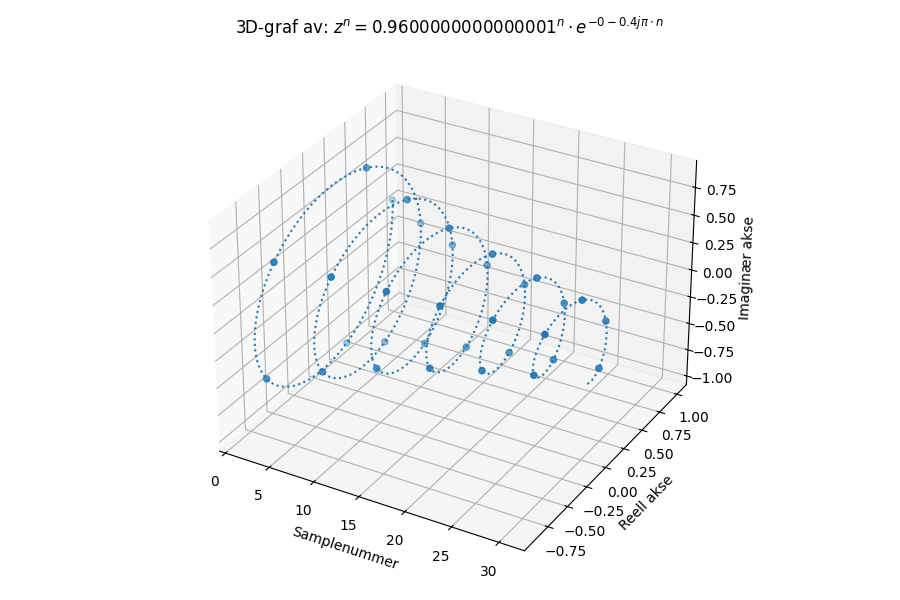

In [2]:
z = 0.96*exp(8j*pi/5)
showDiscreteOscillation(z, N=32, fig_num = 3)

# S-plan og Z-plan
## $$z = e^{s\cdot T_s}$$
<img src="Figurer/14_Ztransform/Fig2_SandZ.png" style="width: 80%; margin-left: 100px" />

## Regneeksempel 1:

* Utfør Z-transformasjon av impulsresponsen $h[n] = \frac{u[n] - u[n-4]}{4}$.

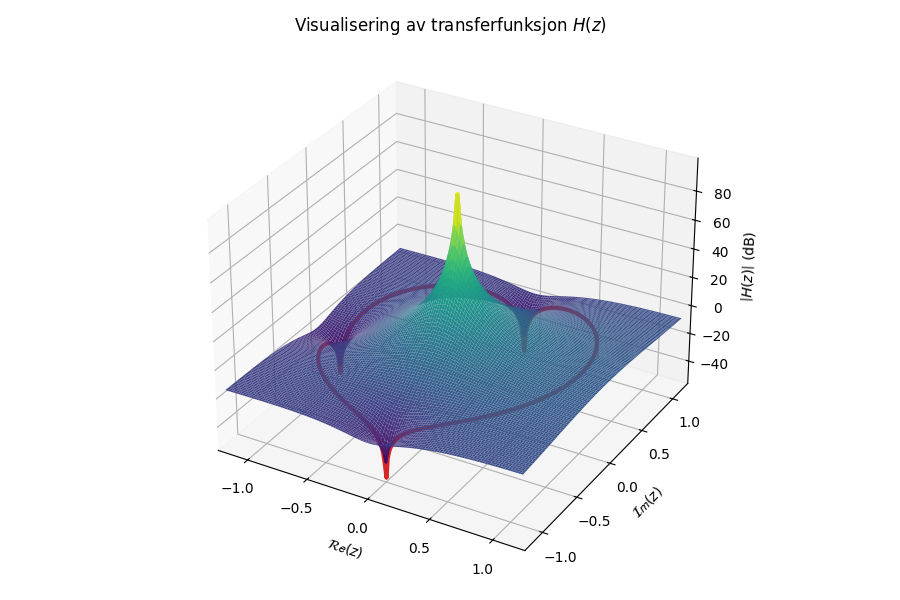

In [3]:
# Filter fra regneeksempel 1:
b = [0.25, 0.25, 0.25, 0.25] 
a = [1]
plt.close(4); plt.figure(4, figsize=(9,6))
tfPlot(b, a) # Ikke standardfunksjon, definert i kildekoden til forelesningen.

# Tidsforskyvning i Z-planet

* Hver sample tidsforskyvning tilsvarer multiplikasjon med $z^{-1}$ i z-planet. 
$$\textbf{Z}(x[n-D]) = z^{-D}\cdot X(z)$$

* I blokkskjemarepresentasjon av filter brukes derfor $z^{-1}$ for å symbolisere tidsforskyvning/delay.

<br>

<img src="Figurer/14_Ztransform/Fig4_Delay.png" style="width: 70%; margin-left: 100px" />

# LTI-filter i Z-domene

<br>

<img src="Figurer/14_Ztransform/Fig3_TF.png" style="width: 70%" align="left"/>

# Transferfunksjon generell form (for kausale system)

* Z-transformen av impulsresponen $h[n]$ til et LTI-system kalles systemets *transferfunksjon*
* For ethvert kausalt LTI-system med filterkoeffisienter **a** og **b**, vil transferfunksjonen være:
\begin{align}
H(z) = \frac{Y(z)}{X(z)} &= \frac{\sum_{k=0}^{M} b_k \cdot z^{-k}}{\sum_{k=0}^{N} a_k \cdot z^{-k}}\\
&\text{eller}\\
&= \frac{b_0 + b_1\cdot z^{-1} + b_2 \cdot z^{-2} + \ldots + b_M \cdot z^{-M}}{a_0 + a_1\cdot z^{-1} + a_2 \cdot z^{-2} + \ldots + a_N \cdot z^{-N}}
\end{align}
* Teller og nevner er polynomer

## Utledning av transferfunksjon:
<img src="Figurer/14_Ztransform/Fig9_Diff2TF.png" style="width: 70%; margin-left: 50px" />

## Regneeksempel 2:

* Finn transferfunksjonen $H(z)$ til filteret i vist i figuren:
<br>

<img src="Figurer/14_Ztransform/Fig5_ExFilt.png" style="width: 70%; margin-left: 100px" />

# Visualisering av $H(z)$

* $H(z)$ funksjon av et komplekst tall.
    * "Gain" i transferfunksjonen av størst interesse
    * Et "Surface Plot" av $|H(z)|$ vil kunne gi informasjon om forsterkningen av ulike typer signal.
    * Amplituderesponsen vil kunne leses av ved å studere konturene langs enhetssirkelen.

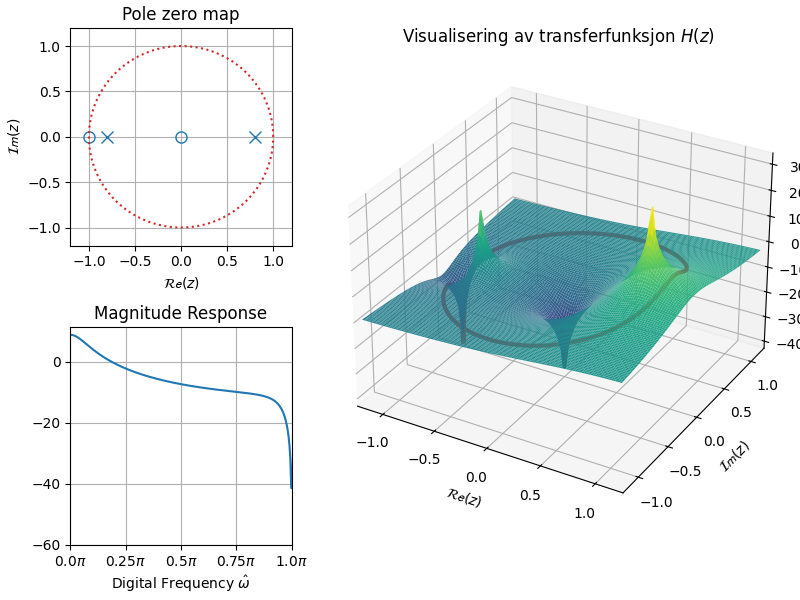

In [4]:
# Filter fra regneeksempel 1:
b = [0.5, 0.5] 
a = [1, 0, -0.64]
#plt.close(4); plt.figure(4, figsize=(9,6))
visualizeTF(b, a) # Ikke standardfunksjon, definert i kildekoden til forelesningen.

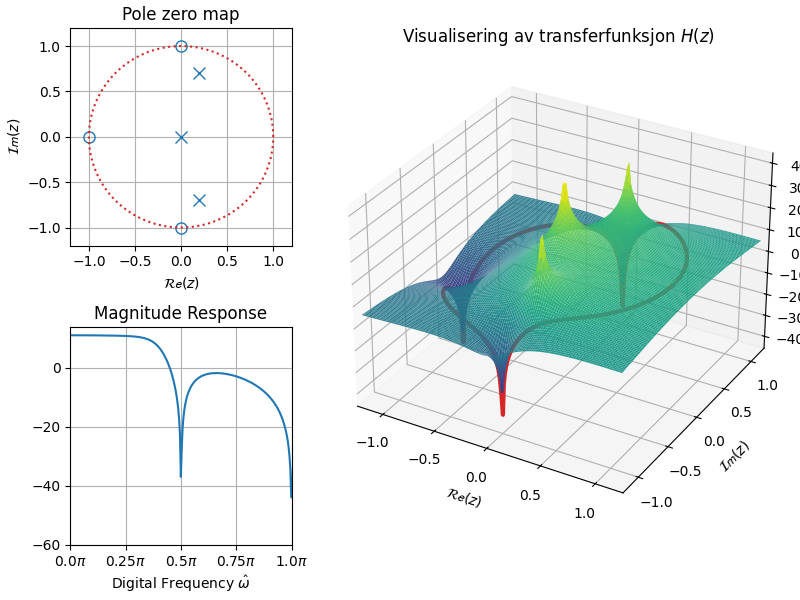

In [5]:
zeroes = [-1, 1j, -1j] 
poles = [-0.7j+0.2, 0.7j+0.2]

b, a  = sig.zpk2tf(zeroes, poles, 1)
visualizeTF(b, a) # Ikke standardfunksjon, definert i kildekoden til forelesningen.

## Repetisjon DTFT
#### Formel

$$H\left(\hat{\omega}\right) = \sum_{n=0}^{\infty}h[n]\cdot e^{-j\hat{\omega}\cdot n}$$

#### For LTI-system

* Dersom $h[n]$ er impulsresponsen til et LTI-system, forteller dette hvordan systemet vil påvirke et inngangssignal $x[n] = e^{-j\omega \cdot n}$ med vinkelfrekvens $\hat{\omega}$.
    * Gjelder også sinusformede signal da  $\cos(\hat{\omega}\cdot n) = \frac{1}{2} e^{j\hat{\omega}\cdot n} + \frac{1}{2} e^{-j \hat{\omega} \cdot n}$.

# Z-plan og frekvensrespons

* Substitusjonen $z=e^{j\hat{\omega}}$ i transferfunksjonen $H(z)$ gir systemets frekvensrespons $H(\hat{\omega})$.

$$ H(\hat{\omega}) = H(z)\bigg|_{z = e^{j\hat{\omega}}}$$

* Frekvensresponsen er oppgitt langs ***enhetssirkelen*** i z-planet.
    * Sirkulær "frekvensakse" medfører at alle aliaser av et digitalt signal er representert av samme punkt i z-planet.
    
<img src="Figurer/14_Ztransform/Fig11_Hz2Hw.png" style="width: 90%" />

## Kodeeksempel:
* Finn frekvensresponsen til transferfunksjonen
$$H(z) = \frac{0.5 + 0.5z^{-1}}{1-0.64z^{-2}}$$

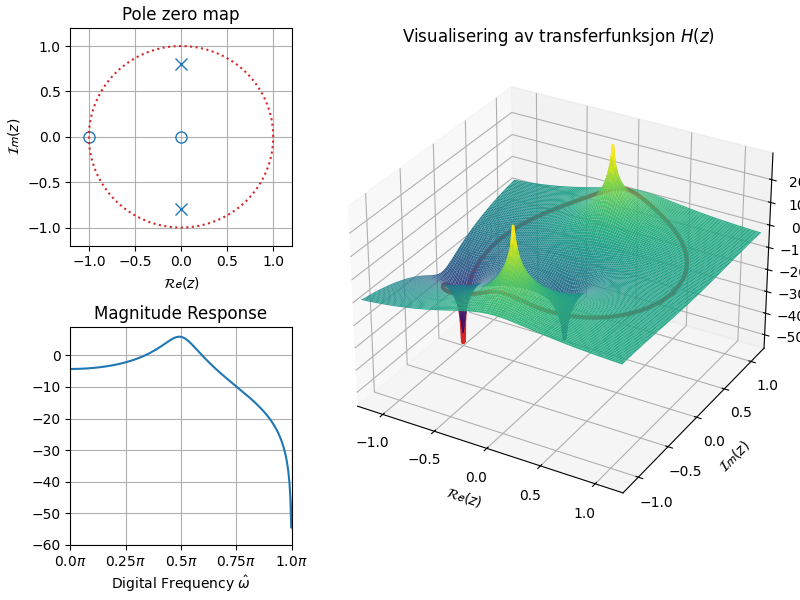

In [6]:
# Filter fra regneeksempel 1:
b = [0.5, 0.5] 
a = [1, 0, 0.64]
visualizeTF(b, a, fig_num=5) # Ikke standardfunksjon, definert i kildekoden til forelesningen.

# Poler og nullpunkt


* Faktorisering av *transferfunksjonen* $H(s)$ gir *poler* og *nullpunkt*
    * Eksempel:
$$H(z) = \frac{z - (-1)}{\left(z-(-0.8)\right)\left(z-0.8\right)}$$
        * Nullpunkt: $z=-1$
        * Poler: $z=\pm 0.8$

# Poler og nullpunkt
<img src="Figurer/14_Ztransform/PZ_lecture/Slide2.PNG" style="width: 70%" align="left"/>

# Poler og nullpunkt
<img src="Figurer/14_Ztransform/PZ_lecture/Slide3.PNG" style="width: 70%" align="left"/>

# Poler og nullpunkt til transferfunksjon
<img src="Figurer/14_Ztransform/PZ_lecture/Slide4.PNG" style="width: 70%" align="left"/>

# Pol- og nullpuntkskart, 1. ordens filter
<img src="Figurer/14_Ztransform/PZ_lecture/Slide5.PNG" style="width: 70%" align="left" />

# Pol- og nullpunktskart 2. ordens filter
<img src="Figurer/14_Ztransform/PZ_lecture/Slide6.PNG" style="width: 70%" align="left"/>

# 2. Ordens filter utledning

<img src="Figurer/14_Ztransform/PZ_lecture/Slide7.PNG" style="width: 70%" align="left"/>

# Poler, nullpunkt og frekvensrespons
<img src="Figurer/14_Ztransform/PZ_lecture/Slide10.PNG" style="width: 70%" align="left"/>

## Illustrasjon
<img src="Figurer/14_Ztransform/PZ_lecture/Slide11.PNG" style="width: 80%" align="left"/>


## Kodeeksempel: Frihåndsdesign av filter

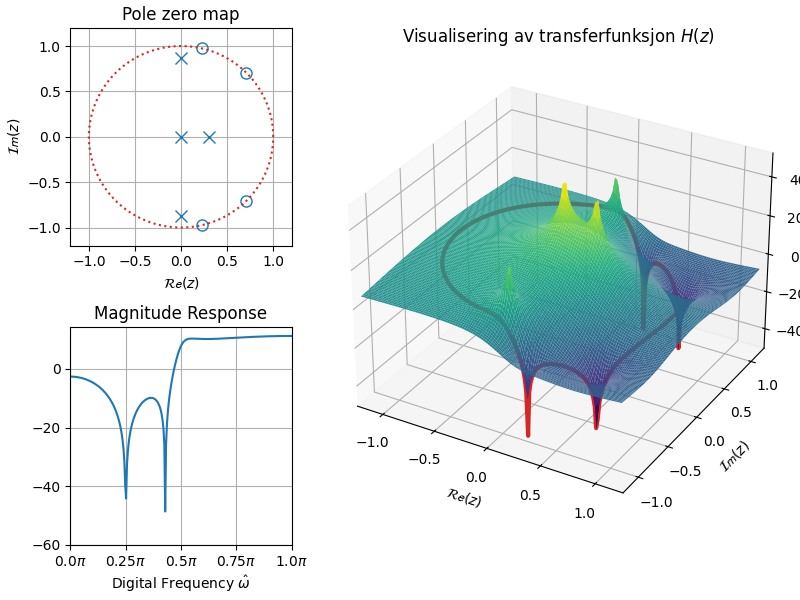

In [7]:
zeroes = np.array([exp(1j*pi/4), exp(-1j*pi/4), exp(1j*3*pi/7), exp(-1j*3*pi/7)])

poles = np.array([0.87*exp(1j*pi/2), 0.87*exp(-1j*pi/2), 0.3])

b, a = sig.zpk2tf(zeroes, poles, 1)
visualizeTF(b, a, fig_num=5)

# Egenskaper Z-transformasjon

<img src="Figurer/14_Ztransform/Fig10_ZtransProps.png" style="width: 85%; margin-left: 50px" />

# Inversfiltre

* Et filter $H(z)$ kan inverteres og gi et nytt filter $G(z) = \frac{1}{H(z)}$ ***så lenge*** samtlige poler *og* nullpunkt er innenfor enhetssirkelen.

* Transferfunksjonen til et system bestående av $H(z)$ og et inversfilter $\frac{1}{H(z)}$ i kaskade blir $H_{\text{tot}}(z)1$.
    * Inversfilter kan m.a.o. brukes til rekonstruksjon/dekonvolusjon av signal.

# Stokastiske signalmodeller, inversfiltre og LMS-algoritmen

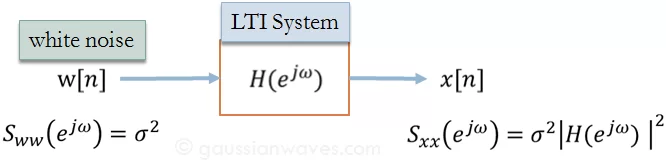

* Det matematiske grunnlaget for LMS-algoritmen fra forrige time er basert på at et inngangssignal kan modelleres som en *stokastisk prossess*
$$x[n] = v[n] - \sum_{k=1}^{M}a_k \cdot x[n-k], \ \ \ v[n] \sim \mathcal{N}(\mu, \sigma^2)$$
    * Der $a_k$ er koeffisientene i ett **all-pole** filter
 


* Kjent som en auto-regressiv (AR) modell

## Eksempel på stokastisk signalmodell

* $a_k$ er *nesten* koeffisientene til en andreordens oscillator (poler like innenfor enhetssirkelen)

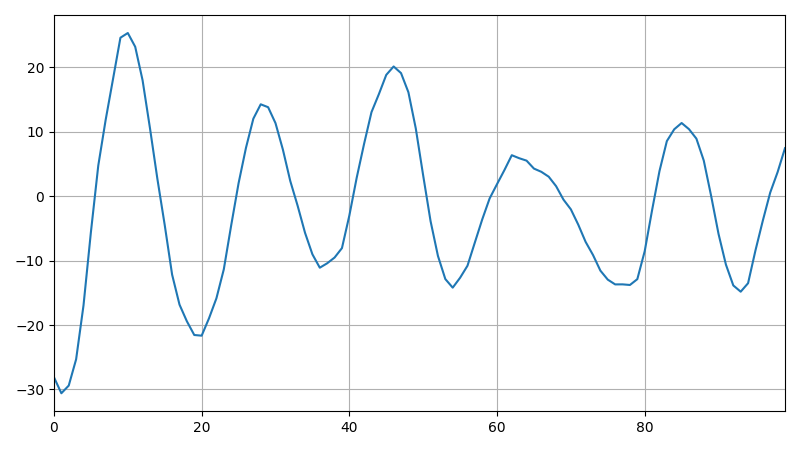

In [8]:
r = 0.99 # Radius for pol-koordinater
w_0 = np.pi/9  # Frekvens for "sinuslignende" signal
a = [1, -2*r*np.cos(w_0), r**2]
vn = np.random.normal(0, 1, size=10000)
xn = sig.lfilter([1], a, vn)
plt.figure()
plt.plot(xn[-100:])

# LMS er et "whitening"-filter
* Målet med algoritmen er at $y[n]$ er hvitt støy.
    * dvs. $e[n] \rightarrow v[n]$
 
* Filteret som produserer $e[n]$ har impulsresponsen $h_e[n]=\delta[n] - h[n]*\delta[n-1]$, der $h[n]$ impulsresponsen vi har funnet med LMS-algoritmen.
    * FIR-filter med koeffisienter $b_k = \{1, -h[0], -h[1], \ldots , -h[M]\}$
    * ***Inversfilteret*** til filteret i AR-modellen av signalet $x[n]$

# Parametrisk spektralanalyse

1. Filteret i AR-modellen er ansvarlig for å *forme* frekvensinnholdet til signalet $x[n]$
2. *Magnituderesponsen* til filteret i AR-modellen er et godt estimat for *spektraltettheten* $S_{xx}{\hat{\omega}}$ til signalet $x[n]$ 

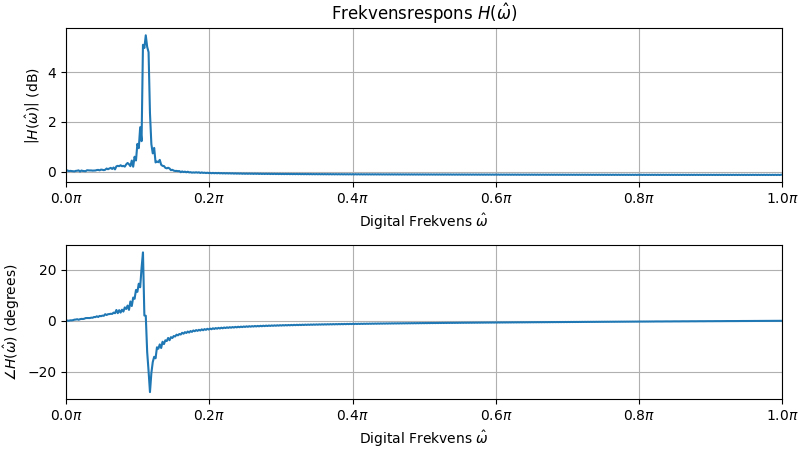

In [17]:
from Kildekode._14_Z_transformasjon import displayFrequencyResponse

def FIR_lms_norm(x, M, mu, alpha=1):
    h = np.zeros(M)  # Initial filter values
    y = np.zeros(len(x))
    err_log = np.zeros(len(x))
    for n in range(0, len(x)):
        n1 = max(n-M, 0)
        n2 = n
        x_indices = np.flip(np.arange(n1, n2))
        x_pred = np.sum(h[0:n2-n1]*x[x_indices])
        x_pow = sum(x[x_indices]**2)
    
        err = x[n]-x_pred
        h[0:n2-n1] += mu*err*x[x_indices]/(alpha + x_pow)
    
        y[n] = x_pred
        err_log[n] = err
    return y, err_log, h

y_n, e_n, h = FIR_lms_norm(xn, M = 512, mu=0.001) 

displayFrequencyResponse(b=[1], a = np.concatenate(([1], -h)), num=5)

# Oppsummering

* Analyse av IIR filtre utføres med *Z-transformasjon*
    * "Mapper" IIR-filteret til $z$-planet basert på hva responsen til et signal på formen $z^{-n}$.
    
    
* Sammenhengen mellom $s$-planet for laplace og $z$-planet fremgår av substitusjonen
$$z = e^{s \cdot T_s}$$
    * Frekvensaksen i $s$-planet avgrenses til $-\frac{F_s}{2} < f < \frac{F_s}{2}$ og "pakkes" rundt enhetssirkelen.
    * Venstre halvplan i $s$-planet flyttes til innsiden av enhetssirkelen på $z$-planet.
    
    
* Z-transforamsjon omformer en *differanseligning* til en *algebraisk ligning*
$$\begin{align}
a_0\cdot y[n] + a_1 \cdot y[n-1] + \ldots + a_N\cdot y[n-N] &= b_0\cdot x[n] + b_1 \cdot x[n-1] + \ldots + b_N\cdot x[n-M] \\
& \Downarrow \text{Z-transformasjon} \\
Y(z)\left(a_0 + a_1 \cdot z^{-1} + \ldots + a_N\cdot z^{-N} \right) &= X(z)\left(b_0 + b_1 \cdot z^{-1} + \ldots + b_N\cdot z^{-M} \right)
\end{align}$$


* Filterets frekvensrespons $H(\hat{\omega})$ finner vi ved å se på $H(z)$ langs enhetssirkelen.
$$ H(\hat{\omega}) = H(z)\big|_{z=e^{j\hat{\omega}}}$$

# Spørsmål?